**Credit Card Fraud Detection**

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#importing the training dataset
train_data = pd.read_csv('/content/drive/MyDrive/capstone/fraudTrain.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#importing the unseen test dataset
test_data = pd.read_csv('/content/drive/MyDrive/capstone/fraudTest.csv')
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0



**Exploratory Data Analysis**

In [ ]:
train_data.shape

(1296675, 23)

In [ ]:
test_data.shape

(555719, 23)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


**Checking for the class imbalance in train data**

In [ ]:
frauds=train_data['is_fraud'].value_counts()
nonfraud_count=frauds[0]/train_data['is_fraud'].count()*100
fraud_count=frauds[1]/train_data['is_fraud'].count()*100

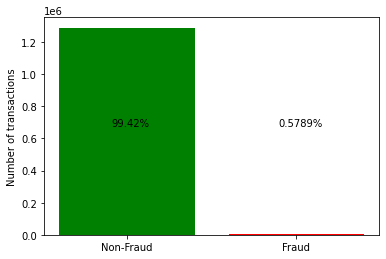

In [ ]:
plt.bar(['Non-Fraud','Fraud'], frauds, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(nonfraud_count),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_count),(0.7, 0.5), xycoords='axes fraction')
plt.show()

**Considering a fraction of it to run faster as the collab is crashing**

In [ ]:
df_train= train_data.sample(frac = 0.1,random_state=1)
df_test= test_data.sample(frac = 0.05,random_state=1)
print(df_train.shape,df_test.shape)

(129668, 23) (27786, 23)


In [ ]:
frauds=df_train['is_fraud'].value_counts()
nonfraud_count=frauds[0]/df_train['is_fraud'].count()*100
fraud_count=frauds[1]/df_train['is_fraud'].count()*100

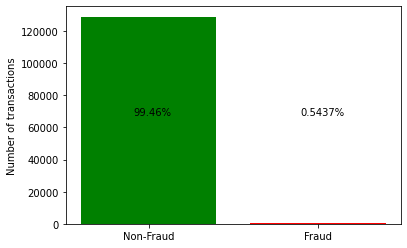

In [ ]:
plt.bar(['Non-Fraud','Fraud'], frauds, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(nonfraud_count),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_count),(0.7, 0.5), xycoords='axes fraction')
plt.show()

**Check for null values in the dataset**

In [ ]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Correlation matrix**

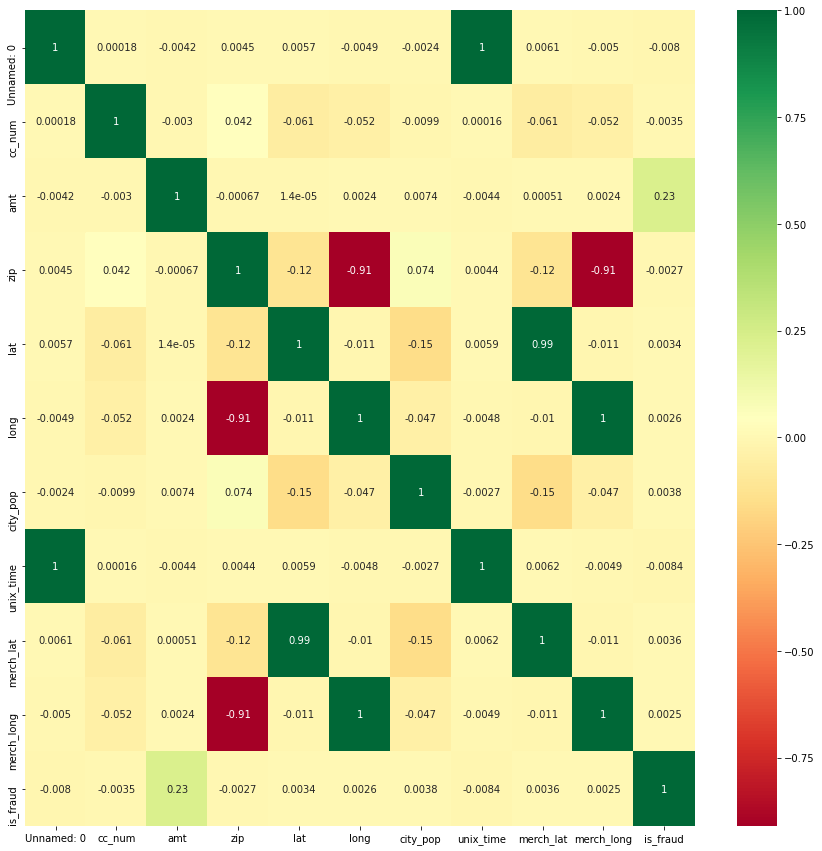

In [ ]:
#get correlations of each features in dataset
corrmat = df_train.corr()
plt.figure(figsize=(15,15))

#plot heat map
sns.heatmap(df_train[corrmat.index].corr(),annot=True,cmap="RdYlGn")

From the correlation matrix it can be seen that there is a more or less significant correlation between "is_fraud" and "amt" column. The correlation among other variables are not of any significance as such.

**Visualising categorical variables**

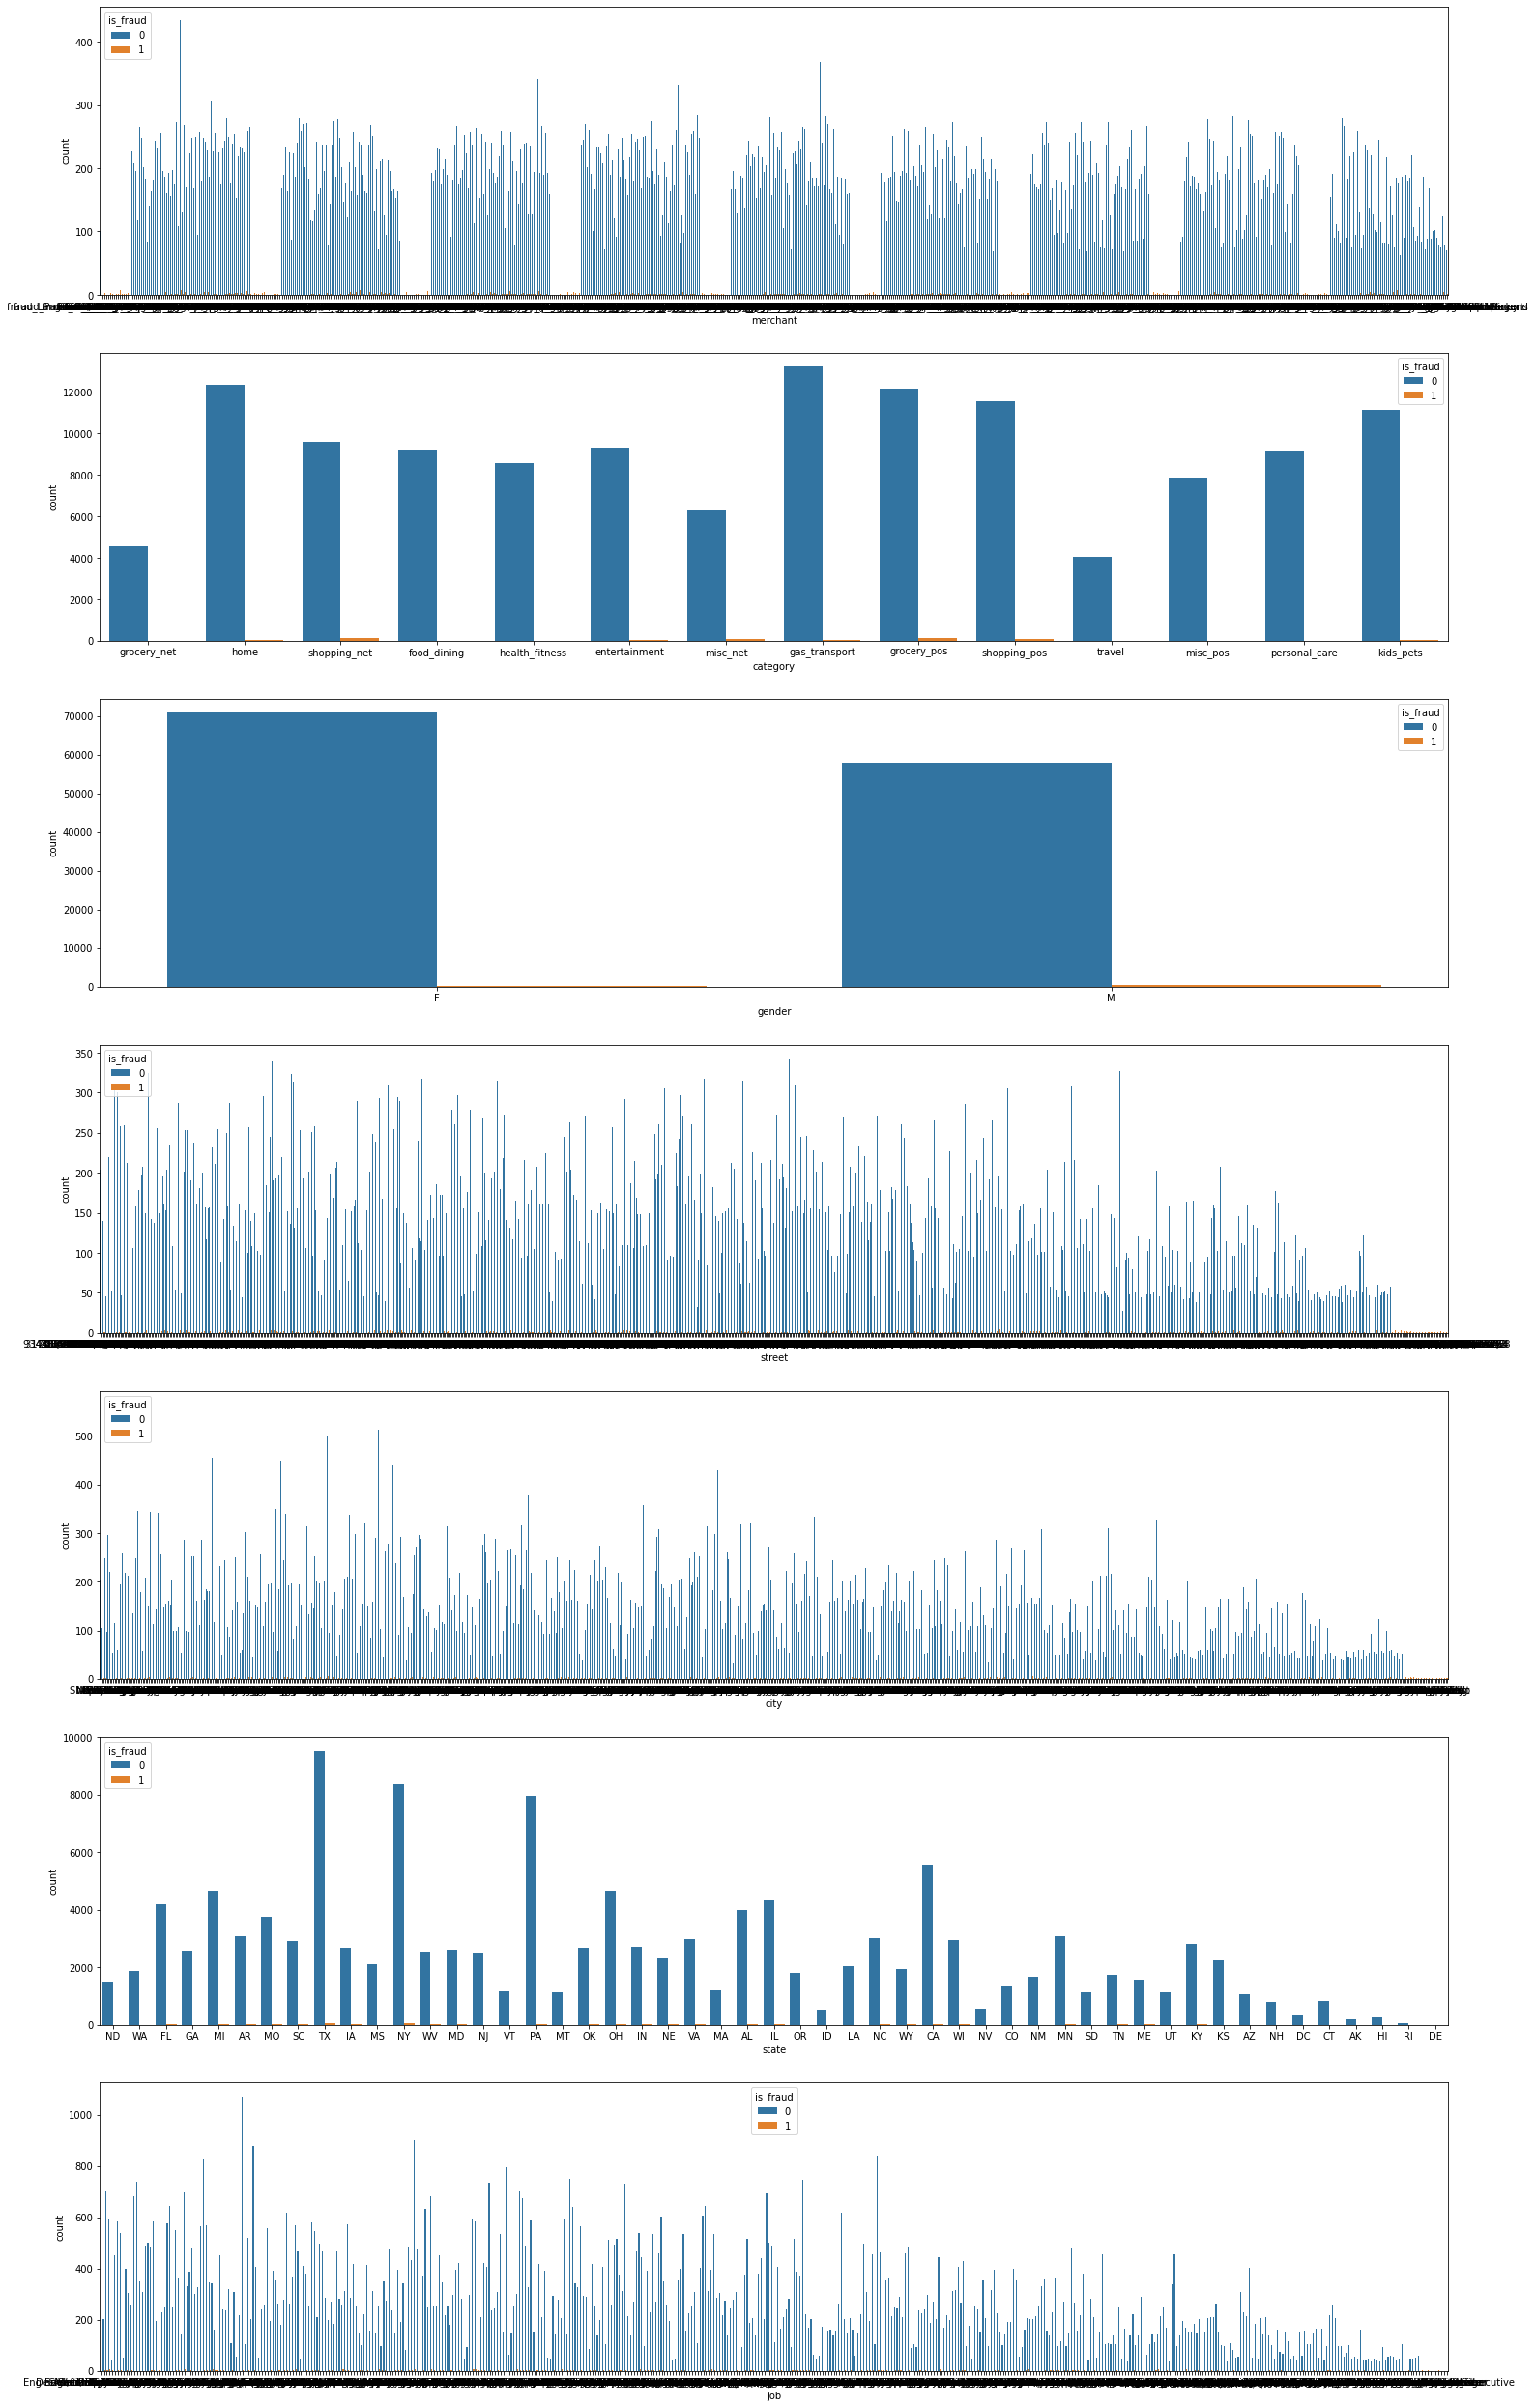

In [ ]:
plt.figure(figsize=(25, 45))
plt.subplot(7,1,1)
sns.countplot(x = 'merchant', hue = 'is_fraud', data = df_train)
plt.subplot(7,1,2)
sns.countplot(x = 'category', hue = 'is_fraud', data = df_train)
plt.subplot(7,1,3)
sns.countplot(x = 'gender', hue = 'is_fraud', data = df_train)
plt.subplot(7,1,4)
sns.countplot(x = 'street', hue = 'is_fraud', data = df_train)
plt.subplot(7,1,5)
sns.countplot(x = 'city', hue = 'is_fraud', data = df_train)
plt.subplot(7,1,6)
sns.countplot(x = 'state', hue = 'is_fraud', data = df_train)
plt.subplot(7,1,7)
sns.countplot(x = 'job', hue = 'is_fraud', data = df_train)
plt.show()

**From the above plots following are observed:**

*   Merchant category of shopping_net, grocery_pos, misc_net and shopping_pos has more number of fraudulent transaction than the rest.
*   Cities like NY, TX and PA has more fraudulent transaction than others

Not any significant observation can be from the other graphs.



In [ ]:
#Checking the column 'merchant'
df_train['merchant'].value_counts(dropna = False)

fraud_Kilback LLC                        442
fraud_Cormier LLC                        380
fraud_Schumm PLC                         370
fraud_Boyer PLC                          358
fraud_Kuhn LLC                           347
                                        ... 
fraud_Hodkiewicz, Prohaska and Paucek     71
fraud_Satterfield-Lowe                    69
fraud_Hahn, Douglas and Schowalter        69
fraud_Towne, Walker and Borer             68
fraud_Little-Gleichner                    63
Name: merchant, Length: 693, dtype: int64

In [ ]:
#checking the column 'category'
df_train['category'].value_counts(dropna = False)

gas_transport     13277
home              12370
grocery_pos       12296
shopping_pos      11610
kids_pets         11169
shopping_net       9756
entertainment      9352
food_dining        9202
personal_care      9124
health_fitness     8587
misc_pos           7889
misc_net           6394
grocery_net        4587
travel             4055
Name: category, dtype: int64

In [ ]:
#checking the column 'city'
df_train['city'].value_counts(dropna = False)

Birmingham     567
Utica          529
Phoenix        513
San Antonio    505
Meridian       473
              ... 
Waukau           1
Clinton          1
Coulee Dam       1
Hubbell          1
Medford          1
Name: city, Length: 867, dtype: int64

In [ ]:
#checking the column 'job'
df_train['job'].value_counts(dropna = False)

Film/video editor                    1074
Exhibition designer                   906
Surveyor, land/geomatics              881
Naval architect                       843
Materials engineer                    833
                                     ... 
Forest/woodland manager                 1
Ship broker                             1
Sales promotion account executive       1
Veterinary surgeon                      1
Information officer                     1
Name: job, Length: 486, dtype: int64

In [ ]:
#checking the column 'street'
df_train['street'].value_counts(dropna = False)

6033 Young Track Suite 804       343
0925 Lang Extensions             339
320 Nicholson Orchard            339
4038 Smith Avenue                333
864 Reynolds Plains              329
                                ... 
368 Rollins Fort Apt. 076          1
27954 Hall Mill Suite 575          1
837 Kimberly Turnpike              1
64965 Morris Hollow Suite 323      1
446 Daniel View Suite 663          1
Name: street, Length: 951, dtype: int64

In [ ]:
#checking the column 'state'
df_train['state'].value_counts(dropna = False)

TX    9591
NY    8425
PA    8004
CA    5583
MI    4689
OH    4677
IL    4340
FL    4219
AL    4022
MO    3794
AR    3114
MN    3103
NC    3033
VA    3007
WI    2964
SC    2936
KY    2827
IN    2718
IA    2703
OK    2701
MD    2622
GA    2587
WV    2578
NJ    2512
NE    2376
KS    2251
MS    2133
LA    2040
WY    1952
WA    1899
OR    1832
TN    1758
NM    1672
ME    1586
ND    1517
CO    1373
MA    1205
VT    1185
SD    1160
UT    1157
MT    1129
AZ    1070
CT     824
NH     793
NV     570
ID     531
DC     380
HI     263
AK     201
RI      61
DE       1
Name: state, dtype: int64

**Visualising numerical variables**

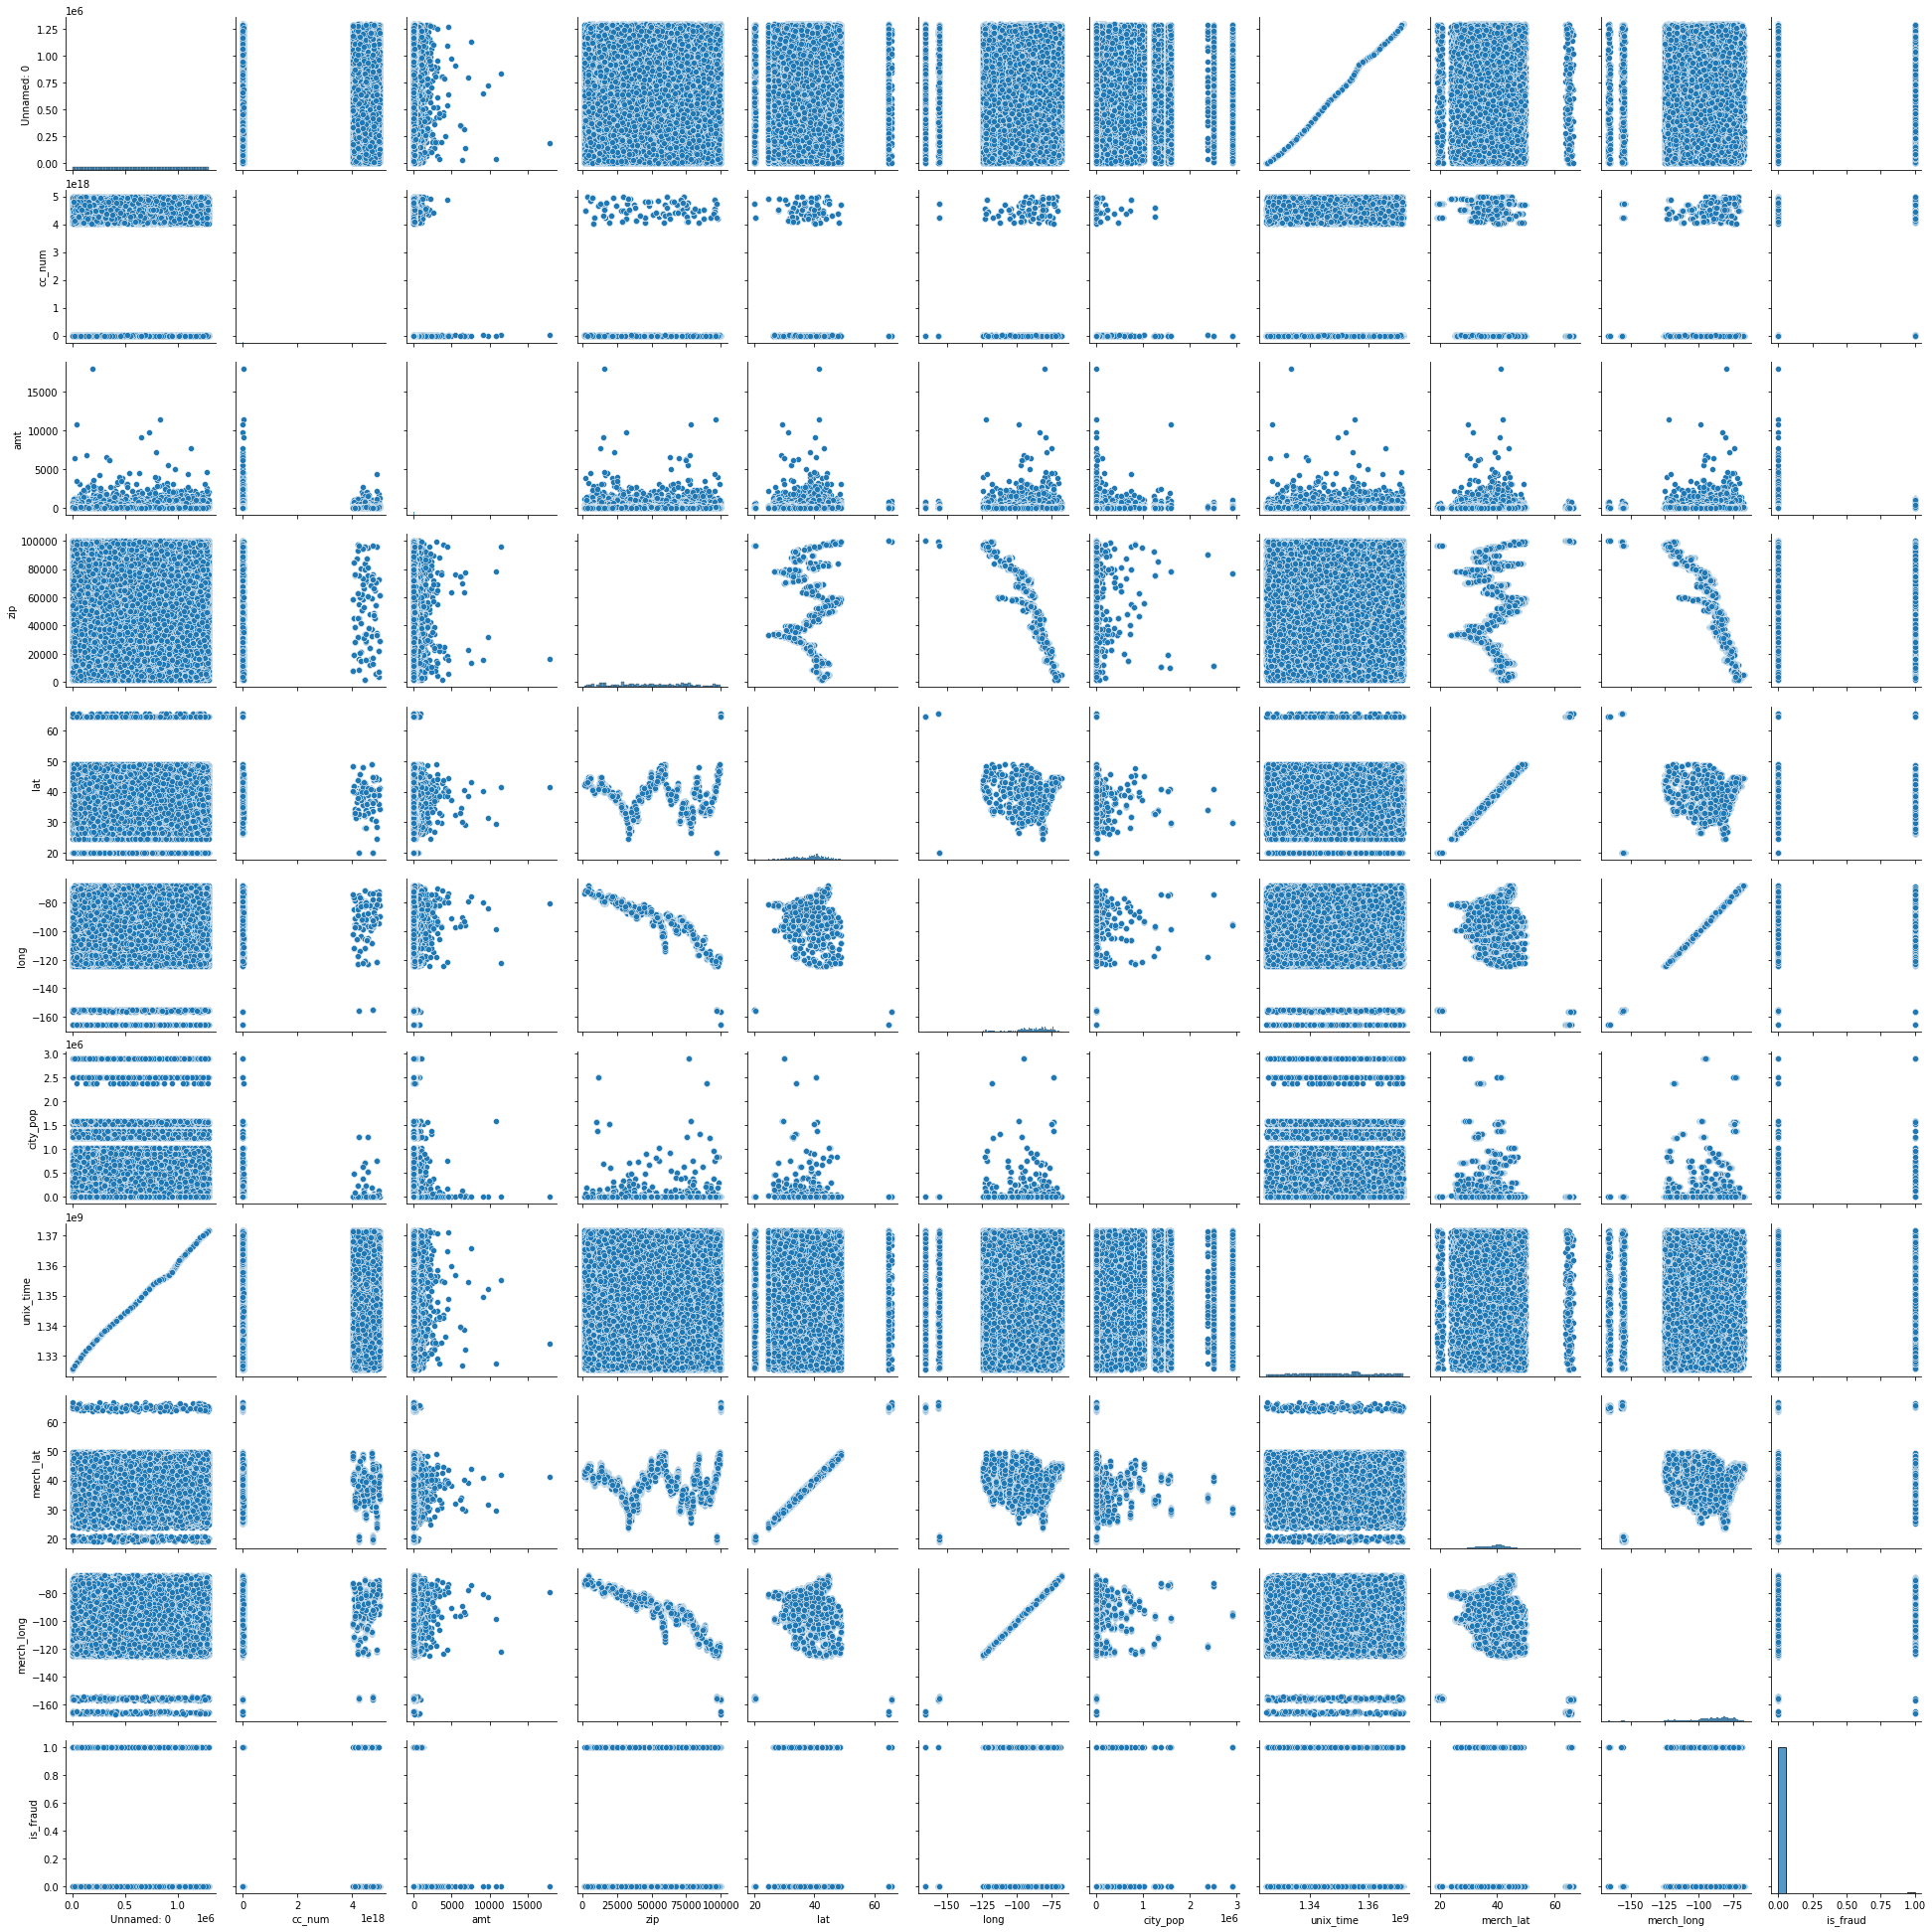

In [ ]:
sns.pairplot(df_train)
plt.show()

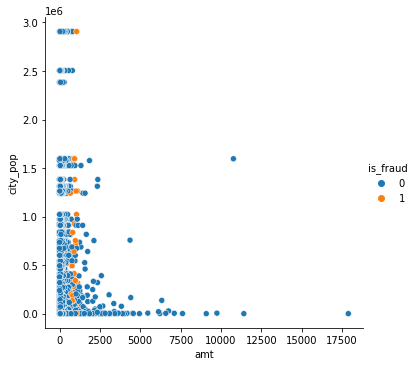

In [ ]:
sns.relplot(y = 'city_pop', x = 'amt' , hue = 'is_fraud',data = df_train)

This shows imbalance in data.

**Data Preparation**

Dropping the columns that are not needed:

*   The **Untitled_0** column contains the indices and hence can be dropped.
*   **cc_num** containing the credit card number is not useful
*   **first** and **last** name can also be dropped
*   **trans_num** with the transaction number can be dropped as well
*   **trans_date_trans_time** column can be dropped as we can't classify any transaction as fraud using that because since its a credit card the transaction can take place in any countries where the time zone is different and analysing this wrt time becomes irrelevant.
*   **dob** column will be removed later after extracting the age





In [ ]:
# function to drop tbe columns
def Col_drop(data):
    col_to_drop = ['Unnamed: 0','trans_date_trans_time','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res

In [ ]:
# dropping the columns
# On the train data set
df_train = Col_drop(df_train)
# On the test data set
df_test = Col_drop(df_test)

print ( df_train.shape, df_test.shape)

(129668, 17) (27786, 17)


**Converting the dob column to age**

In [ ]:
# function to convert dob to years
def age_in_years(dob):
    return 2021 - int(dob[0:4])

# replacing the dob column with age column in our data set for test and train
df_train['age'] = df_train['dob'].apply(lambda x: age_in_years(x))
df_train = df_train.drop(['dob'],axis =1)

df_test['age'] = df_test['dob'].apply(lambda x: age_in_years(x))
df_test = df_test.drop(['dob'],axis =1)
print(df_train.shape,df_test.shape)

(129668, 17) (27786, 17)


In [ ]:
df_train.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1330158280,46.398331,-99.813959,0,73
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1334260215,45.687331,-117.488135,0,78
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1370037053,27.254081,-81.974799,0,43
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1348160812,34.551957,-83.374265,0,24
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1346455370,43.032957,-83.521294,0,26


**Creating Dependent and independent features**

In [ ]:
columns = df_train.columns.tolist()

# removing the dependent feature is_fraud
columns = [c for c in columns if c not in ["is_fraud"]]

X_df = df_train[columns]
Y_df = df_train['is_fraud']
X_test = df_test[columns]
Y_test = df_test['is_fraud']
print ( X_df.shape, Y_df.shape,X_test.shape, Y_test.shape)

(129668, 16) (129668,) (27786, 16) (27786,)


**Converting categorical features to numerical features using one-hot encoding**

In [ ]:
# concanating the datasets so that number of columns remain the same in both the data sets
final_df = pd.concat([X_df,X_test],axis=0)
final_df.shape

(157454, 16)

In [ ]:
# creating the list of categorical variables
categorical_features =[feature for feature in final_df.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [ ]:
#observing the unique values in each feature
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(final_df[feature].unique())))

Distinct categories for merchant  are 693
Distinct categories for category  are 14
Distinct categories for gender  are 2
Distinct categories for street  are 957
Distinct categories for city  are 872
Distinct categories for state  are 51
Distinct categories for job  are 486


In [ ]:
# function to convert categorical variables to one hot encoding
def category_onehot_encoding(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1             
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [ ]:
# applying the one hot encoding
final_df  = category_onehot_encoding(final_df, categorical_features)

merchant
category
gender
street
city
state
job


In [ ]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(157454, 3077)

In [ ]:
#splitting the train and test dataset back
X_df=final_df.iloc[:129668,:]
X_test=final_df.iloc[129668:,:]
print(X_df.shape,X_test.shape)

(129668, 3077) (27786, 3077)


**Checking for outliers**

In [ ]:
# Checking for outliers in the continuous variables
num_fraud1 = X_df[['amt','city_pop','age']]
num_fraud2 = X_test[['amt','city_pop','age']]

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_fraud1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age
count,129668.000000,1.296680e+05,129668.000000
mean,70.061919,8.856453e+04,47.721990
std,153.627239,3.015705e+05,17.374394
min,1.000000,2.300000e+01,16.000000
25%,9.630000,7.410000e+02,34.000000
50%,47.360000,2.456000e+03,46.000000
75%,82.940000,2.032800e+04,59.000000
90%,136.560000,1.861400e+05,73.000000
95%,196.749500,5.257130e+05,82.000000
99%,543.913000,1.577385e+06,93.000000


In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_fraud2.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age
count,27786.000000,2.778600e+04,27786.000000
mean,69.894569,9.111106e+04,47.532210
std,181.028553,3.107636e+05,17.435645
min,1.000000,2.300000e+01,16.000000
25%,9.670000,7.430000e+02,34.000000
50%,46.590000,2.435000e+03,46.000000
75%,82.690000,1.968500e+04,59.000000
90%,135.655000,1.901780e+05,72.000000
95%,193.995000,5.451470e+05,81.000000
99%,528.560000,1.580147e+06,93.000000


There are outliers present in "amt" and "city_pop" column which needs to be capped.

**Capping of outliers**

In [ ]:
# Capping outliers at 1% and 99%
num_col= ['amt', 'city_pop', 'age']


In [ ]:
X_df.shape

(129668, 3077)

In [ ]:
for col in X_df.columns:
    if col in num_col:
        percentiles = X_df[col].quantile([0.01,0.99]).values
        X_df[col][X_df[col] <= percentiles[0]] = percentiles[0]
        X_df[col][X_df[col] >= percentiles[1]] = percentiles[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/

**Splitting data into train and validation set**

In [ ]:
from sklearn import model_selection

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_df, Y_df, stratify=Y_df, random_state=0)

In [ ]:
print(np.sum(Y_df))
print(np.sum(y_train))
print(np.sum(y_val))
print(np.sum(Y_test))

705
529
176
130


In [ ]:
print(y_train.value_counts(),"\n",y_val.value_counts(),"\n",Y_test.value_counts())

0    96722
1      529
Name: is_fraud, dtype: int64 
 0    32241
1      176
Name: is_fraud, dtype: int64 
 0    27656
1      130
Name: is_fraud, dtype: int64


In [ ]:
# files for testing on models
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, Y_test.shape)

(97251, 3077) (32417, 3077) (27786, 3077) (97251,) (32417,) (27786,)


In [ ]:
529/97251

0.005439532755447245

From the above it can be seen that the data is highly skewed as only 0.05% of the trained dataset contains Class 1 data. Thus we need to handle imbalance and then apply the model evaluations.